---Importing pandas and numpy---

In [1]:
import pandas as pd
import numpy as np

---Loading datasets---

In [2]:
bank = pd.read_csv("C:\\Users\\James Ukonu\\Downloads\\bank-full.csv", sep=",")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


---Preprocessing Stage -- Data Cleaning--

---Data Preparation -- Convert Categorical Variables to Number---Label Encoding---

In [4]:
def replace_marital(value):
    if value == 'single':
        return 0
    else:
        return 1

bank['marital'] = bank['marital'].apply(replace_marital, 1)

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank['housing'] = bank['housing'].map({
    'no': 0,
    'yes': 1
}.get)

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,secondary,no,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,unknown,no,1,0,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank['loan'] = bank['loan'].map({
    'no': 0,
    'yes': 1
}.get)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,0,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,1,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,1,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

---Using np.nan to replace the unknown values---

In [11]:
bank['job'].replace({
    'unknown': np.nan,
    'management': 0,
    'technician': 1,
    'entrepreneur': 2,
    'blue-collar': 3,
    'retired': 4,
    'admin.': 5,
    'services': 6,
    'self-employed': 7,
    'unemployed': 8,
    'housemaid': 9,
    'student': 10
}, inplace=True)

In [12]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,tertiary,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,secondary,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,secondary,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,unknown,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,unknown,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [14]:
bank['education'].replace({
    'unknown': np.nan,
    'tertiary': 0,
    'secondary': 1,
    'primary': 2,
}, inplace=True)

In [15]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,no,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,no,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,no,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,no,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,no,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
bank['default'].replace({
    'no': 0,
    'yes': 1,
}, inplace=True)

In [18]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


---Normalization with Min-Max technique-- Label Encoding---

In [19]:
bank['balance'].min()

-8019

In [20]:
bank['balance'].max()

102127

In [21]:
bank['balance'] = bank['balance'].apply(lambda v: (v - bank['balance'].min()) / (bank['balance'].max() - bank['balance'].min()))

In [22]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,0.073067,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,0.072822,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,0.086476,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,0.072812,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [24]:
bank['contact'].replace({
    'unknown': np.nan,
    'cellular': 0,
    'telephone': 1,
}, inplace=True)

In [25]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,may,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,may,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,may,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,may,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,may,198,1,-1,0,unknown,no


In [26]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [27]:
bank['month'] = bank['month'].map({
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'oct': 10,
    'nov': 11,
    'dec': 12,
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'sep': 9,
})

In [28]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,261,1,-1,0,unknown,no
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,151,1,-1,0,unknown,no
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,76,1,-1,0,unknown,no
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,-1,0,unknown,no
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,198,1,-1,0,unknown,no


In [29]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [30]:
bank['poutcome'] = bank['poutcome'].map({
    'unknown': np.nan,
    'failure': 0,
    'other': 1,
    'success': 2
})

In [31]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,261,1,-1,0,NaN,no
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,151,1,-1,0,NaN,no
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,76,1,-1,0,NaN,no
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,-1,0,NaN,no
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,198,1,-1,0,NaN,no


In [32]:
bank['pdays'] = bank['pdays'].apply(lambda v: (v - bank['pdays'].min()) / (bank['pdays'].max() - bank['pdays'].min()))

In [33]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,261,1,0.0,0,NaN,no
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,151,1,0.0,0,NaN,no
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,76,1,0.0,0,NaN,no
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,0.0,0,NaN,no
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,198,1,0.0,0,NaN,no


In [34]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [35]:
bank['y'].replace({
    'no': 0,
    'yes': 1,
}, inplace=True)

In [36]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,261,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,151,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,76,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,92,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,198,1,0.0,0,NaN,0


In [37]:
bank['duration'] = bank['duration'].apply(lambda v: (v - bank['duration'].min()) / (bank['duration'].max() - bank['duration'].min()))

In [38]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,0.040260,1,0.0,0,NaN,0


--View Basic Statistics for the variables/Data--

In [39]:
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923.000000,45211.000000,43354.000000,45211.000000,45211.000000,45211.000000,45211.000000,32191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,8252.000000,45211.000000
mean,40.936210,3.152483,0.717104,0.851225,0.018027,0.085171,0.555838,0.160226,0.090274,15.806419,6.144655,0.052494,2.763841,0.047245,0.580323,0.589190,0.116985
std,10.618762,2.688623,0.450411,0.665358,0.133049,0.027643,0.496878,0.366820,0.286578,8.322476,2.408034,0.052364,3.098021,0.114827,2.303441,0.779957,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.073457,0.000000,0.000000,0.000000,8.000000,5.000000,0.020943,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.076871,1.000000,0.000000,0.000000,16.000000,6.000000,0.036600,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.085768,1.000000,0.000000,0.000000,21.000000,8.000000,0.064864,3.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,63.000000,1.000000,275.000000,2.000000,1.000000


--- Exproting Cleaned Data to remove index on another file location ---

In [40]:
bank.to_csv("C:\\Users\\James Ukonu\\Downloads\\newdata.csv", index=False)

--- Importing the data ---

In [41]:
banked_df = pd.read_csv("C:\\Users\\James Ukonu\\Downloads\\newdata.csv")

In [42]:
banked_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,0.040260,1,0.0,0,NaN,0


--- Correlation of variables ---

In [43]:
banked_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.013356,0.427817,0.166899,-0.017879,0.097783,-0.185513,-0.015655,0.192750,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,0.052541,0.025155
job,-0.013356,1.000000,-0.031205,0.339922,-0.006023,-0.033140,-0.031715,-0.013083,0.069042,-0.028223,-0.069002,0.008279,-0.034093,0.007664,-0.007873,0.029759,0.017330
marital,0.427817,-0.031205,1.000000,0.162779,-0.003115,0.012537,0.020475,0.051716,0.054711,0.007412,0.068586,-0.020328,0.023120,-0.027943,-0.017006,-0.052454,-0.063526
education,0.166899,0.339922,0.162779,1.000000,0.011842,-0.069306,0.079123,0.027893,0.112050,-0.026564,-0.072787,-0.002656,-0.004092,-0.004031,-0.025067,-0.080167,-0.070928
default,-0.017879,-0.006023,-0.003115,0.011842,1.000000,-0.066745,-0.006025,0.077234,-0.017514,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.025484,-0.022419
balance,0.097783,-0.033140,0.012537,-0.069306,-0.066745,1.000000,-0.068768,-0.084350,0.036435,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.052063,0.052838
housing,-0.185513,-0.031715,0.020475,0.079123,-0.006025,-0.068768,1.000000,0.041323,-0.055054,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,-0.284507,-0.139173
loan,-0.015655,-0.013083,0.051716,0.027893,0.077234,-0.084350,0.041323,1.000000,-0.017217,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.104977,-0.068185
contact,0.192750,0.069042,0.054711,0.112050,-0.017514,0.036435,-0.055054,-0.017217,1.000000,0.021754,0.007552,-0.030813,0.068352,-0.026902,0.002481,0.019362,-0.012098
day,-0.009120,-0.028223,0.007412,-0.026564,0.009424,0.004503,-0.027982,0.011370,0.021754,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,0.016398,-0.028348


---Plotting Graphs to view variations, Matrices, Correlations among variables in the Dataset---

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

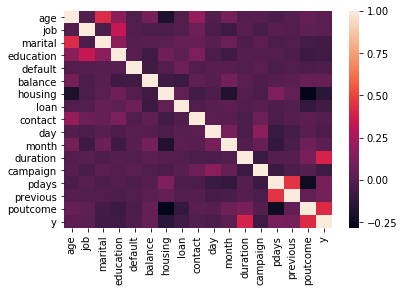

In [45]:
sb.heatmap(banked_df.corr())

In [46]:
banked_df.corr()['y'].sort_values(ascending=False)

y            1.000000
poutcome     0.421175
duration     0.394521
pdays        0.103621
previous     0.093236
balance      0.052838
age          0.025155
month        0.018717
job          0.017330
contact     -0.012098
default     -0.022419
day         -0.028348
marital     -0.063526
loan        -0.068185
education   -0.070928
campaign    -0.073172
housing     -0.139173
Name: y, dtype: float64

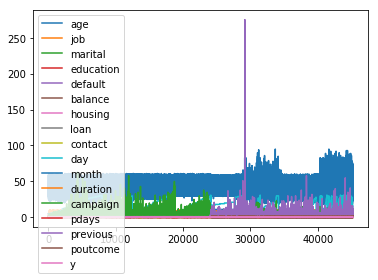

In [47]:
banked_df.plot()

In [48]:
import warnings
warnings.filterwarnings('ignore')

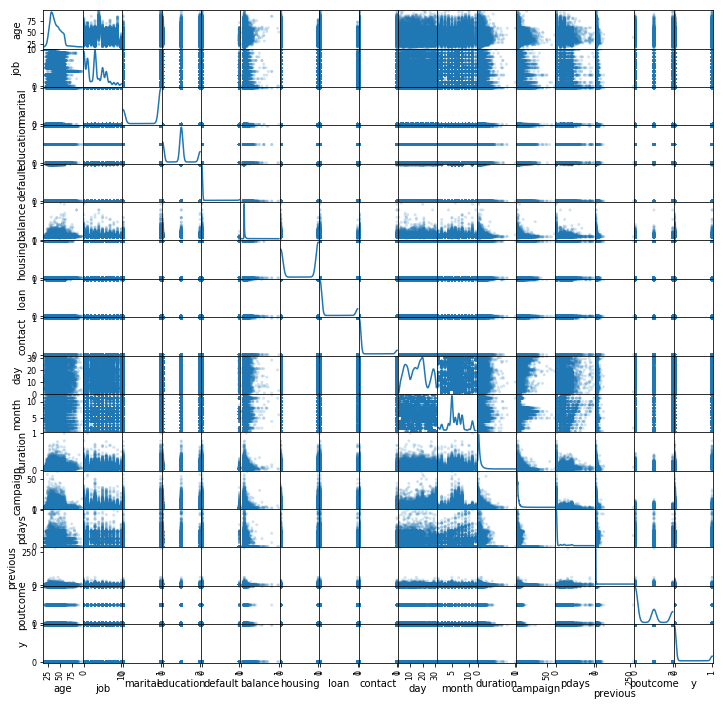

In [49]:
pd.plotting.scatter_matrix(banked_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

---Finding Outliers in the datasets---

([<matplotlib.axis.XTick at 0x28455b579b0>,
 <a list of 17 Text xticklabel objects>)

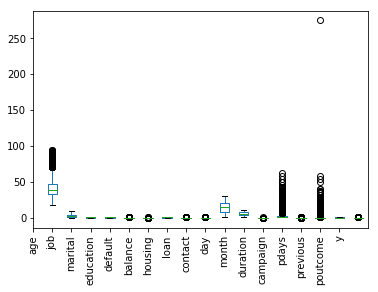

In [50]:
banked_df.plot.box()
plt.xticks(list(range(len(banked_df.columns))), banked_df.columns, rotation="vertical")

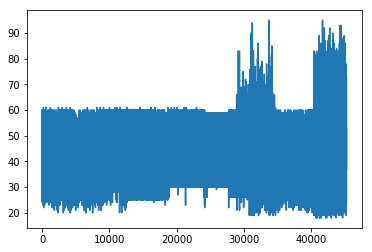

In [51]:
plt.plot(bank.age.values)

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

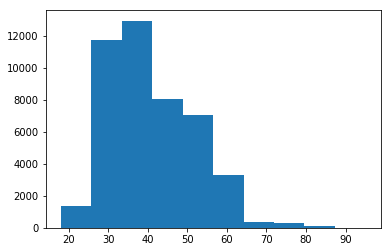

In [52]:
plt.hist(bank.age.values)

---Quartiles & Normalization for Age Variable---

In [53]:
low = 0.01
high = 0.99
banked_df.quantile([low, high])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0.01,23.0,0.0,0.0,0.0,0.0,0.067111,0.0,0.0,0.0,2.0,1.0,0.002237,1.0,0.000000,0.0,0.0,0.0
0.99,71.0,10.0,1.0,2.0,1.0,0.192326,1.0,1.0,1.0,31.0,11.0,0.258032,16.0,0.425459,8.9,2.0,1.0


In [54]:
qdf = banked_df.quantile([low, high])

In [55]:
qdf.age

0.01    23.0
0.99    71.0
Name: age, dtype: float64

In [56]:
qdf.age[low]

23.0

In [57]:
banked_df.age = banked_df.age.apply(lambda v: v if qdf.age[low] < v < qdf.age[high] else np.nan)

In [58]:
banked_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44.0,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33.0,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47.0,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33.0,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,0.040260,1,0.0,0,NaN,0


---View Basic Statistics for the variables/Data---

In [59]:
banked_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,44217.000000,44923.000000,45211.000000,43354.000000,45211.000000,45211.000000,45211.000000,45211.000000,32191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,8252.000000,45211.000000
mean,40.761110,3.152483,0.717104,0.851225,0.018027,0.085171,0.555838,0.160226,0.090274,15.806419,6.144655,0.052494,2.763841,0.047245,0.580323,0.589190,0.116985
std,9.827775,2.688623,0.450411,0.665358,0.133049,0.027643,0.496878,0.366820,0.286578,8.322476,2.408034,0.052364,3.098021,0.114827,2.303441,0.779957,0.321406
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.073457,0.000000,0.000000,0.000000,8.000000,5.000000,0.020943,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.076871,1.000000,0.000000,0.000000,16.000000,6.000000,0.036600,2.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,5.000000,1.000000,1.000000,0.000000,0.085768,1.000000,0.000000,0.000000,21.000000,8.000000,0.064864,3.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,63.000000,1.000000,275.000000,2.000000,1.000000


In [60]:
banked_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,0.0,1,0.0,0,0.092259,1,0,NaN,5,5,0.053070,1,0.0,0,NaN,0
1,44.0,1.0,0,1.0,0,0.073067,1,0,NaN,5,5,0.030704,1,0.0,0,NaN,0
2,33.0,2.0,1,1.0,0,0.072822,1,1,NaN,5,5,0.015453,1,0.0,0,NaN,0
3,47.0,3.0,1,NaN,0,0.086476,1,0,NaN,5,5,0.018707,1,0.0,0,NaN,0
4,33.0,NaN,0,NaN,0,0.072812,0,0,NaN,5,5,0.040260,1,0.0,0,NaN,0


---Calculating missing values(NA) and Variables---

In [61]:
banked_df.isna().sum()

age            994
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [62]:
banked_df.count()

age          44217
job          44923
marital      45211
education    43354
default      45211
balance      45211
housing      45211
loan         45211
contact      32191
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome      8252
y            45211
dtype: int64

In [63]:
banked_df.age.unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., nan, 26., 61.,
       66., 62., 67., 70., 65., 68., 64., 69., 63.])

---Showing Covariance---

In [64]:
banked_df.cov()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,96.585164,0.102519,1.851187,1.047492,-0.020784,0.022833,-0.818020,-0.018053,0.419207,-0.795454,2.168849,-0.009039,0.269505,-0.036274,-0.199191,0.169673,-0.008454
job,0.102519,7.228696,-0.037801,0.604274,-0.002159,-0.002463,-0.042339,-0.012933,0.054695,-0.631341,-0.446830,0.001166,-0.283500,0.002369,-0.048877,0.063790,0.014975
marital,1.851187,-0.037801,0.202870,0.048779,-0.000187,0.000156,0.004582,0.008545,0.007132,0.027784,0.074389,-0.000479,0.032261,-0.001445,-0.017644,-0.018965,-0.009196
education,1.047492,0.604274,0.048779,0.442701,0.001049,-0.001273,0.026128,0.006872,0.021012,-0.146815,-0.116705,-0.000093,-0.008346,-0.000309,-0.038856,-0.040425,-0.015123
default,-0.020784,-0.002159,-0.000187,0.001049,0.017702,-0.000245,-0.000398,0.003769,-0.000636,0.010435,0.004802,-0.000070,0.006934,-0.000458,-0.005617,-0.001646,-0.000959
balance,0.022833,-0.002463,0.000156,-0.001273,-0.000245,0.000764,-0.000945,-0.000855,0.000303,0.001036,0.006297,0.000031,-0.001248,0.000011,0.001062,0.001129,0.000469
housing,-0.818020,-0.042339,0.004582,0.026128,-0.000398,-0.000945,0.246888,0.007532,-0.007887,-0.115711,-0.208055,0.000132,-0.036326,0.007085,0.042435,-0.107555,-0.022226
loan,-0.018053,-0.012933,0.008545,0.006872,0.003769,-0.000855,0.007532,0.134557,-0.001818,0.034711,0.019113,-0.000238,0.011341,-0.000958,-0.009331,-0.028055,-0.008039
contact,0.419207,0.054695,0.007132,0.021012,-0.000636,0.000303,-0.007887,-0.001818,0.082127,0.051507,0.005980,-0.000462,0.058374,-0.000996,0.001905,0.004030,-0.001231
day,-0.795454,-0.631341,0.027784,-0.146815,0.010435,0.001036,-0.115711,0.034711,0.051507,69.263609,2.043951,-0.013164,4.189519,-0.088917,-0.991307,0.101275,-0.075827


In [65]:
banked_df.to_csv("C:\\Users\\James Ukonu\\Downloads\\newdata.csv", index=False)

---Uniqueness of Response Variables---

In [67]:
banked_df.y.unique()

array([0, 1], dtype=int64)

Import libraries for machine learning models
Splitting the Datasets into Train and Test datasets

In [68]:
import sklearn
from pandas import Series, DataFrame 
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

Dropping NAN to run models

In [69]:
bankers = pd.read_csv("C:\\Users\\James Ukonu\\Downloads\\newdata.csv")
bankers = bankers.dropna(how='any')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(bankers.drop('y', axis=1),
                                                   bankers['y'], test_size=0.2,
                                                   random_state=111)

In [71]:
print(X_train.shape)
print(y_train.shape)

(6057, 16)
(6057,)


In [72]:
X_train[0:5]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
43831,28.0,10.0,0,0.0,0,0.073875,0,0,0.0,31,5,0.017283,2,0.041284,5,1.0
39220,29.0,0.0,1,0.0,0,0.075690,1,0,0.0,18,5,0.291582,2,0.409404,4,0.0
39517,54.0,8.0,1,1.0,0,0.086975,0,0,0.0,25,5,0.071574,3,0.214450,2,0.0
37117,33.0,1.0,1,1.0,0,0.074810,1,0,0.0,13,5,0.136031,1,0.408257,4,0.0
29094,45.0,1.0,1,1.0,0,0.089309,0,0,0.0,2,2,0.040057,1,0.277523,2,1.0


In [73]:
bankers.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

---Import Scaling the values for the Variables---

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
columns = ["age", "job", "education", "day", "month", "campaign", "pdays", "previous", "poutcome"]
bankers[columns] = scaler.fit_transform(bankers[columns])
bankers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,0.195652,0.5,1,0.0,0,0.080811,0,0,1.0,0.666667,0.818182,0.007930,0.0,0.172414,0.007299,0.0,0
24062,0.391304,0.5,0,0.5,0,0.070561,1,1,1.0,0.666667,0.818182,0.105531,0.0,0.189655,0.000000,0.5,1
24064,0.195652,0.6,1,0.5,0,0.104071,1,0,1.0,0.666667,0.818182,0.029280,0.0,0.103448,0.010949,0.0,1
24072,0.260870,0.0,1,0.0,0,0.094729,1,0,1.0,0.700000,0.818182,0.014843,0.0,0.097701,0.010949,0.5,0
24077,0.260870,0.0,1,0.0,0,0.072803,1,0,1.0,0.733333,0.818182,0.028467,0.0,0.163218,0.007299,0.0,1


In [77]:
print('length of X_train: ',len(X_train), '\nlength of y_train: ',len(y_train))
print('\n length of X_test: ',len(X_test), '\n length of y_test: ',len(y_test))

length of X_train:  6057 
length of y_train:  6057

 length of X_test:  1515 
 length of y_test:  1515


In [78]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
print('Train Accuracy:', LogReg.score(X_train,y_train))
print('Test Accuracy:', LogReg.score(X_test,y_test))

Train Accuracy: 0.839854713554565
Test Accuracy: 0.8211221122112211


In [80]:
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1072,   86],
       [ 185,  172]], dtype=int64)

Model Evaluation

Classification report without cross validation

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1158
           1       0.67      0.48      0.56       357

   micro avg       0.82      0.82      0.82      1515
   macro avg       0.76      0.70      0.72      1515
weighted avg       0.81      0.82      0.81      1515



Using Cross Validation and Confusion Matrix

In [82]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[4496,  262],
       [ 720,  579]], dtype=int64)

In [83]:
precision_score(y_train, y_train_pred)

0.6884661117717004

In [84]:
pred_LogReg = LogReg.predict(X_test)
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, pred_LogReg)))
probs_LogReg = LogReg.predict_proba(X_test)[:,1]
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs_LogReg)))


Accuracy score: 
0.8211221122112211

Area Under Curve: 
0.846915622898555


In [85]:
bankers[45:49]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24359,0.608696,0.4,1,0.5,0,0.122038,0,1,0.0,0.533333,0.909091,0.018910,0.000000,0.131034,0.000000,0.0,0
24366,0.695652,0.1,1,0.5,0,0.079059,1,0,0.0,0.533333,0.909091,0.022367,0.000000,0.117241,0.010949,0.0,0
24395,0.217391,0.5,0,0.5,0,0.072803,1,0,0.0,0.533333,0.909091,0.043514,0.000000,0.198851,0.003650,0.0,0
24402,0.173913,0.5,0,0.5,0,0.112242,1,0,0.0,0.533333,0.909091,0.016063,0.066667,0.134483,0.007299,0.0,0


In [86]:
test_subscr = np.array([42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02, 3, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_subscr))
print(LogReg.predict_proba(test_subscr))

[1]
[[6.43929354e-15 1.00000000e+00]]


---DecisionTreeClassifier Stages below at different max_depth---

In [87]:
from sklearn import tree

In [88]:
dt = tree.DecisionTreeClassifier(random_state=111, max_depth=2)
dt.fit(X_train,y_train)
dt_score_train = dt.score(X_train,y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test,y_test)
print("Testing score: ",dt_score_test)

Training score:  0.8461284464256232
Testing score:  0.838943894389439


In [89]:
dt = tree.DecisionTreeClassifier(random_state=111, max_depth=3)
dt.fit(X_train,y_train)
dt_score_train = dt.score(X_train,y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test,y_test)
print("Testing score: ",dt_score_test)

Training score:  0.8476143305266634
Testing score:  0.8396039603960396


In [90]:
dt = tree.DecisionTreeClassifier(random_state=111, max_depth=4)
dt.fit(X_train,y_train)
dt_score_train = dt.score(X_train,y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test,y_test)
print("Testing score: ",dt_score_test)

Training score:  0.8505860987287436
Testing score:  0.8415841584158416


In [91]:
dt = tree.DecisionTreeClassifier(random_state=111, max_depth=5)
dt.fit(X_train,y_train)
dt_score_train = dt.score(X_train,y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test,y_test)
print("Testing score: ",dt_score_test)

Training score:  0.8677563150074294
Testing score:  0.8415841584158416


In [92]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_score_train = dt.score(X_train,y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test,y_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.8066006600660066


In [93]:
y_newpred = dt.predict(X_test)
cm = confusion_matrix(y_test,y_newpred)
cm

array([[1015,  143],
       [ 150,  207]], dtype=int64)

In [94]:
print(classification_report(y_test, y_newpred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1158
           1       0.59      0.58      0.59       357

   micro avg       0.81      0.81      0.81      1515
   macro avg       0.73      0.73      0.73      1515
weighted avg       0.81      0.81      0.81      1515



In [95]:
bankers.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,0.195652,0.5,1,0.0,0,0.080811,0,0,1.0,0.666667,0.818182,0.007930,0.0,0.172414,0.007299,0.0,0
24062,0.391304,0.5,0,0.5,0,0.070561,1,1,1.0,0.666667,0.818182,0.105531,0.0,0.189655,0.000000,0.5,1


In [96]:
test_subnew = np.array([42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02, 3, 0, 0, 0, 1]).reshape(1,-1)

print(dt.predict(test_subnew))
print(dt.predict_proba(test_subnew))

[1]
[[0. 1.]]


In [97]:
pred_dt = dt.predict(X_test)
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, pred_dt)))
probs_dt = dt.predict_proba(X_test)[:,1]
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(y_test, probs_dt)))


Accuracy score: 
0.8066006600660066

Area Under Curve: 
0.7281715795126342
